# Introduction to Computer Vision
<center>
    <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png />
</center>


**OBJECTIVES**

- Build Edge Detector from scratch
- Understand and implement Convolutional operations with filter
- Understand and implement Max Pooling 
- Use `keras` to implement a Convolutional Neural Network



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Building a Classic Neural Net for Images

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

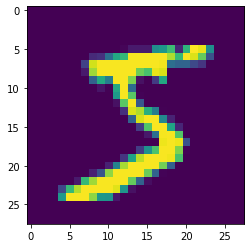

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train[0].shape

(28, 28)

In [13]:
digit_model1 = Sequential() #template for network
digit_model1.add(Flatten())
digit_model1.add(Dense(100, activation = 'relu')) #hidden layer with 100 nodes
digit_model1.add(Dense(10, activation = 'softmax')) #output 10 nodes because we have 10 classes -- 'softmax'(multiclass)

In [14]:
#compile!
digit_model1.compile(loss = 'categorical_crossentropy', metrics = ['accuracy']) #loss for multi-class metric for classification

In [16]:
###DATA PREP

#scale our X
x_train = x_train/255
x_test = x_test/255
#one hot encode our y
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [17]:
history = digit_model1.fit(x_train, y_train_ohe,
                 validation_data=(x_test, y_test_ohe),
                 epochs = 20,
                )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3713 - accuracy: 0.6528 - val_loss: 0.7161 - val_accuracy: 0.8245
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5592 - accuracy: 0.8555 - val_loss: 0.4390 - val_accuracy: 0.8855
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8886 - val_loss: 0.3612 - val_accuracy: 0.9020
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.8999 - val_loss: 0.3280 - val_accuracy: 0.9081
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.9050 - val_loss: 0.3076 - val_accuracy: 0.9131
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.9104 - val_loss: 0.2965 - val_accuracy: 0.9156
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.9133 - val_loss: 0.2891 - val_accuracy:

In [18]:
# #use with scikitlearn
### THIS FUNCTION BUILDS A NETWORK
# def networker(layer_1_units = 22, layer_1_activation = 'relu'):
#     model = Sequential()
#     model.add(Flatten())
#     model.add(Dense(layer_1_units, activation = layer_1_activation))
#     model.add(Dense(10, activation = 'softmax'))

#     model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
#     return model

# #Make the Classifier
# kclass = KerasClassifier(build_fn=networker)

# kclass.fit(train_images, train_labels)

# from sklearn.pipeline import make_pipeline

# from sklearn.model_selection import GridSearchCV

# params = {'layer_1_units': [10, 20, 100],
#          'layer_1_activation': ['relu', 'tanh']}

# grid = GridSearchCV(kclass, param_grid=params)

# grid.fit(train_images, train_labels)

# grid.best_params_

# grid.best_score_

### Some Basic Image Work

In [19]:
#create 5 by 5 image
np.random.seed(22)
im = np.random.randint(low = 1, high = 10, size = 25).reshape(5, 5)

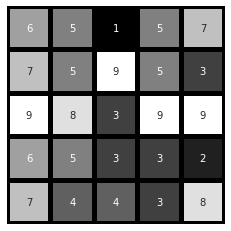

In [20]:
#visualize
sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black')
plt.xticks([])
plt.yticks([]);

In [21]:
#three by three filter
f = np.zeros((3, 3))
f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
f[:, 0] = 1
f[:, -1] = -1
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

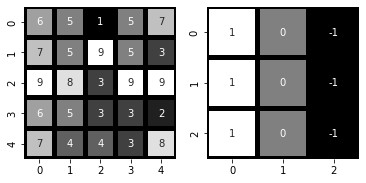

In [23]:
#side by side images
fig, ax = plt.subplots(1, 2)

sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[0])


sns.heatmap(f, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[1])


In [24]:
#select upper left corner of image
im[:3, :3]

array([[6, 5, 1],
       [7, 5, 9],
       [9, 8, 3]])

In [25]:
#convolve
np.sum(im[:3, :3]*f)

9.0

In [26]:
#What is this doing?
output = np.zeros((3, 3))
for row in range(3):
    for col in range(3):
        output[row, col] = np.sum(f*im[row: row + 3, col: col + 3])

In [27]:
#examine output
output

array([[ 9., -1., -6.],
       [ 7.,  1.,  1.],
       [12.,  2., -9.]])

### Detecting Edges

In [28]:
#10 by 10 grid
im2 = np.zeros((10, 10))
im2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
#make first half 10
im2[:, :5] = 10

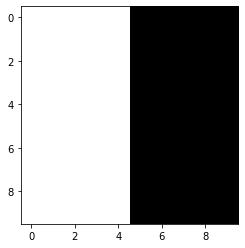

In [30]:
#take a look
plt.imshow(im2, cmap = 'gray')

In [31]:
#convolutions
output = np.zeros((8, 8))
for row in range(8):
    for col in range(8):
        output[row, col] = np.sum(f * im2[row: row + 3, col: col + 3])

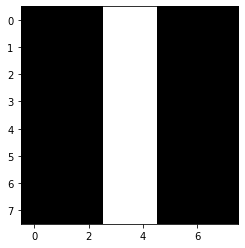

In [32]:
#take a look at result
plt.imshow(output, cmap = 'gray')

In [34]:
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

### Edges in X-Rays

**GOAL**: Formalize work from above in a class with a vertical and horizontal edge detector.  Your class should have a `.fit()` method that takes in an image and passes the edge detectors over it once, and a `.show` image that plots the image, vertical edges, and horizontal edges in a 1 x 3 grid.

In [35]:
chest = plt.imread('images/person10_bacteria_43.jpeg')

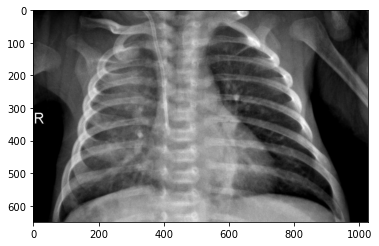

In [36]:
plt.imshow(chest, cmap = 'gray')

In [37]:
rows = chest.shape[0] - 2
cols = chest.shape[1] - 2

output = np.zeros((rows, cols))
for row in range(rows):
    for col in range(cols):
        output[row, col] = np.sum(f * chest[row: row + 3, col: col + 3])

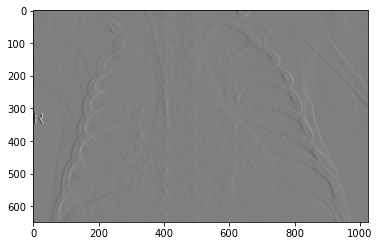

In [38]:
plt.imshow(output, cmap = 'gray')

### Max Pooling

<center>
<img src = https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png />
</center>

- Selects maximum value from 2 x 2 square.  In the image above, we have a *stride* of 2.

- Operation will follow convolution

### Using keras

In [39]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [48]:
cnn_model = Sequential()
#convolve and pool -- extracting features
cnn_model.add(Conv2D(16, (3, 3), activation = 'relu'))
cnn_model.add(MaxPool2D((2, 2)))


#flatten 
cnn_model.add(Flatten())
#feed into regular network
cnn_model.add(Dense(100, activation = 'relu'))

cnn_model.add(Dense(10, activation = 'softmax'))

In [49]:
cnn_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [51]:
x_test.shape

(10000, 28, 28, 1)

In [52]:
x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)

In [53]:
history = cnn_model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe),
             epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1624 - accuracy: 0.6941 - val_loss: 0.4598 - val_accuracy: 0.8681
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3929 - accuracy: 0.8839 - val_loss: 0.3311 - val_accuracy: 0.9012
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3163 - accuracy: 0.9063 - val_loss: 0.2785 - val_accuracy: 0.9190
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2718 - accuracy: 0.9190 - val_loss: 0.2403 - val_accuracy: 0.9286
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2351 - accuracy: 0.9302 - val_loss: 0.2082 - val_accuracy: 0.9376
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2065 - accuracy: 0.9385 - val_loss: 0.1830 - val_accuracy: 0.9433
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1836 - accuracy: 0.9448 - val_loss: 0.1669 - val_

### Activity: Practice with `keras`

Use the `fashion_mnist` data to construct and compare a standard Artificial Neural Network and one using Convolutions.  

In [54]:
from keras.datasets import fashion_mnist

In [59]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [60]:
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

In [61]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

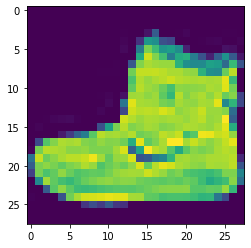

In [58]:
plt.imshow(X_train[0])

In [62]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [63]:
cnn_model = Sequential()

cnn_model.add(Conv2D(10, (3, 3), activation = 'relu'))
cnn_model.add(MaxPool2D((2, 2)))




cnn_model.add(Flatten())

cnn_model.add(Dense(100, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [64]:
history = cnn_model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4294 - acc: 0.8467 - val_loss: 0.3284 - val_acc: 0.8849
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2918 - acc: 0.8951 - val_loss: 0.3021 - val_acc: 0.8929
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2546 - acc: 0.9081 - val_loss: 0.2761 - val_acc: 0.9008
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2300 - acc: 0.9171 - val_loss: 0.2801 - val_acc: 0.9026
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2141 - acc: 0.9230 - val_loss: 0.2743 - val_acc: 0.9054
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2001 - acc: 0.9274 - val_loss: 0.2885 - val_acc: 0.9045
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1900 - acc: 0.9323 - val_loss: 0.2796 - val_acc: 0.9048
Epoch 8/20
1875/1875 [==============================] -

In [68]:
y_test_preds = np.argmax(cnn_model.predict(X_test), axis = 1)

In [72]:
cnn_model.predict(X_test)[0]

array([1.2151999e-12, 1.5861303e-18, 1.6942406e-10, 1.1038360e-16,
       1.4592484e-14, 8.2195539e-09, 1.5446965e-10, 1.2562038e-05,
       1.7569070e-09, 9.9998748e-01], dtype=float32)

In [69]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [70]:
y_test == y_test_preds

array([ True,  True,  True, ...,  True,  True, False])

In [71]:
y_test_preds

array([9, 2, 1, ..., 8, 1, 7])

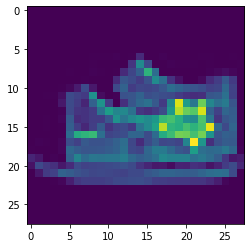

In [76]:
plt.imshow(X_test[-1].reshape(28, 28))